In [123]:
%pylab inline
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Не до конца понимаю, как работает pcolormesh, но я сделала так, как было в вашем конспекте, так что должно быть правильно. 

В частности, непонятно зачем интенсивность должна быть в двумерном массиве.

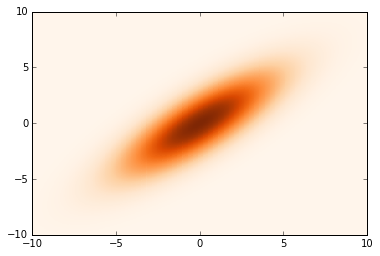

In [126]:
grid_x, grid_y = np.mgrid[-10:10:0.05, -10:10:0.05] 
size = len(grid_x[0])
density = np.zeros(size**2).reshape(size, size)
for i in range(size):
    for j in range(size):
        density[i][j] = sps.multivariate_normal.pdf((grid_x [i, j], grid_y [i, j]), mean=[0, 0], cov=[[10, 8], [8, 10]]) 
plt.pcolormesh(grid_x, grid_y, density, cmap='Oranges')
plt.show()

Получили график плотности случайного вектора $\xi=(\xi_1,\xi_2) \sim N(a, \Sigma)$, где $a=0$, а $\Sigma=\begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix}$

$f_{X \mid Y}(x \mid y_0) = \frac {f_{X,Y}(x,y_0)} {f_Y(y_0)}$ - формула для условного распределения

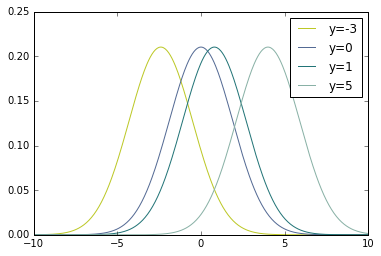

In [127]:
for y in [-3, 0, 1, 5]:
    grid = np.linspace(-10, 10, 400) #решетка для построения графика
    pairs = np.array([grid, np.linspace(y, y, 400)]).transpose() #пары для подсчета плотности
    mult = sps.multivariate_normal.pdf(pairs, mean=[0, 0], cov=[[10, 8], [8, 10]]) #подсчет значения плотности многомерного распредления 
    smpl = sps.norm.pdf(np.linspace(y, y, 400), loc=0, scale=math.sqrt(10)) #подсчет плотности для обычного нормального распредления
    res = np.zeros(400)
    res = mult / smpl #итоговые значения плотности
    plt.plot(grid, res, color=random.rand(3,1), label='y=' + str(y))

plt.legend()
plt.show()

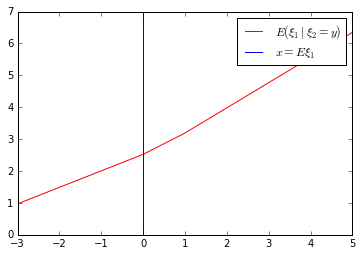

In [122]:
x = [-3, 0, 1, 5] 
y = np.zeros(4)
for i in range(4):
    y[i] = sps.norm.expect(loc=0 , scale=math.sqrt(10), conditional=True, lb=x[i]) #подсчет условного мат ожидания
plt.plot(x, y, color='red', label=r'$E(\xi_1\mid\xi_2 = y)$')

expect = sps.norm.expect(loc=0, scale=math.sqrt(10)) #подсчет обычного мат ожидания
plt.plot([expect, expect], [0, 7], color='blue', label=r'$x=E\xi_1$')

plt.legend()
plt.show()